In [1]:
import math
from heapq import nsmallest
import math
import array
import random
import copy

import matplotlib
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
%matplotlib inline

# import pyvisgraph as pvg
import shapely.geometry.polygon as sgp
import shapely.geometry.linestring as sgls
import shapely.geometry.point as spt
import shapely.affinity as saf
from shapely import geometry


from Rectangle import Rectangle
from Point import Point
# import baseClass
# from baseClass import baseParent, Room , Furniture

In [2]:
def plot_graph(grid):
    """Plot numpy 2d Grid"""
    cmap = colors.ListedColormap(['black', 'white', 'red', 'blue', 'orange', 'yellow', 'green', 'purple', 'brown',
                                  'gold', 'gray', 'navy', 'firebrick', 'khaki', 'olive', 'lime', 'teal', 'indigo', 'magenta', 'pink'])
    bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    gridx, gridy = grid.shape
    plt.ylim(0, gridx)
    plt.imshow(grid, cmap=cmap, norm=norm)


def plot_room(redAreas, room):
    """Convert Room red areas to be numpy 2d grid"""
    grid = np.zeros((room.top_right.x, room.top_right.y))
    temp = 12
    for item in room.redAreas:
        x1 = int(item["point"].x)
        y1 = int(item["point"].y)
        x2 = x1 + int(item["furniture"].top_right.x)
        y2 = y1 + int(item["furniture"].top_right.y)
        grid[x1:x2, y1:y2] = temp
        temp = temp+10
    plot_graph(np.transpose(grid))

In [3]:
def randomly_change(curr_room):
    
   

    room = Room(curr_room.bottom_left,curr_room.top_right, curr_room.name
               ,curr_room.object_importance)
    room.redAreas = copy.deepcopy(curr_room.redAreas)


    change = random.randint(1,6)
    item_index = random.randint(0,5)
    if(change == 1):
        room.pos_change(item_index, random.randint(0,10))
            #print("Item Position Changed")
#     change = random.randint(1,10)
    if(change == 2):
        room.rotate(item_index)
            #print("Item Rotated")

#     change = random.randint(1,10)
    if(change == 3):
        room.align(room.redAreas[item_index]["furniture"], "object")
            #print("item Aligned to object")

#     change = random.randint(1,10)
    if(change == 4):
        room.align(room.redAreas[item_index]["furniture"], "wall")
            #print("item Aligned to wall")

#     change = random.randint(1,10)
    if(change == 5):
        room.snap(room.redAreas[item_index]["furniture"], "wall")
            #print("item Snapped to wall")

#     change = random.randint(1,10)
    if(change == 6):
        room.snap(room.redAreas[item_index]["furniture"], "object")
                #print("item Snapped to object")
    
    return room               

In [25]:
# object_importance= np.array([1,1,3])
# r1=Room(Point(0,0), Point(100,100), 'Bed Room',object_importance)
p1=Furniture(Point(0,0), Point(10,12), 'Table',1)
p2=Furniture(Point(0,0), Point(4,6), 'Chair',2, additional_attr = {'snap_direct':['back']})
p3=Furniture(Point(0,0), Point(30,40), 'Bed',3)
p4=Furniture(Point(0,0), Point(10,12), 'Table',1)
p5=Furniture(Point(0,0), Point(8,12), 'Chair',2)
p6=Furniture(Point(0,0), Point(20,40), 'Bed',3)
furniture_list = [p1, p2, p3, p4, p5, p6]
# furniture_list = [p2]  

In [26]:
object_importance= np.array([1,1,3])
fittest_room = Room(Point(0,0), Point(100,100), 'Bed Room',object_importance)
# fittest_room.fit(furniture_list)
fittest_room.fit(furniture_list)


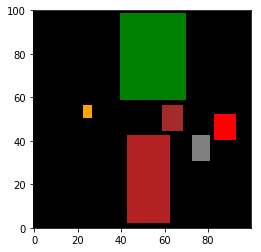

In [27]:
plot_room(fittest_room.redAreas, fittest_room)

In [ ]:
fittest_room.squeeze()

In [ ]:
fittest_room.spread()

In [28]:
fittest_room.blocker((3,5),(10,10))

/home/hamzaimtiaz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1093: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


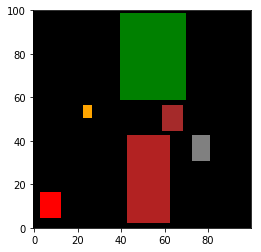

In [29]:
plot_room(fittest_room.redAreas, fittest_room)

In [30]:
# object_importance= np.array([1,1,3])
# fittest_room = Room(Point(0,0), Point(100,100), 'Bed Room',object_importance)
# # fittest_room.fit(furniture_list)
# fittest_room.squeeze_fit(furniture_list)

roomPoints= [geometry.Point(0,0),geometry.Point(100,0)
                     ,geometry.Point(100,100),geometry.Point(0,100)]

roomRect = sgp.Polygon([(0, 0), (100, 0), (100, 100), (0, 100)])

minx, miny, maxx, maxy = roomRect.bounds

width = maxx - minx
height = maxy - miny
dR_room = math.hypot(width, height)

for count in range(5):
    all_changed_rooms = []
    all_changed_rooms_score = []

    for count in range(5):

        room_second_gen = randomly_change(fittest_room)
        all_changed_rooms.append(room_second_gen)

    for room in all_changed_rooms:

        room_cost = room.cost_function(room.redAreas , roomPoints ,dR_room)
        all_changed_rooms_score = np.append(all_changed_rooms_score
                                                      , room_cost)
    
    smallest = np.partition(all_changed_rooms_score, 0)[0]
    itemindex = np.where(all_changed_rooms_score==smallest)

    curr_cost = fittest_room.cost_function(fittest_room.redAreas, roomPoints ,dR_room)
    
    
    if(curr_cost > smallest):
        fittest_room = all_changed_rooms[itemindex[0][0]]
        


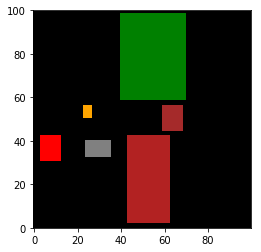

In [31]:
plot_room(fittest_room.redAreas, fittest_room)

In [ ]:
r1.pos_change(0,10)

In [ ]:
r1.rotate(0)

In [ ]:
r1.snap(furniture_list[0], "object")

In [ ]:
plot_room(r1.redAreas, r1)

In [ ]:
r1.snap(furniture_list[0], "wall")

In [ ]:
plot_room(r1.redAreas, r1)

In [ ]:
plot_room(r1.redAreas, r1)

In [ ]:
r1.snap(furniture_list[3], "wall")
plot_room(r1.redAreas, r1)

In [ ]:
r1.snap(furniture_list[0], "wall")
plot_room(r1.redAreas, r1)